Predict Credit Card Consumption

Understanding the consumption pattern for credit cards at an individual consumer level is important for customer relationship management. This understanding allows banks to customize for consumers and make strategic marketing plans. Thus it is imperative to study the relationship between the characteristics of the consumers and their consumption patterns.   XYZ Bank has given a sample of their customers, along with their details like age, gender and other demographics. Also shared are information on liabilities, assets and history of transactions with the bank for each customer.   In addition to the above, data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September). Predict the average spend for a different set of customers in the test set for the coming 3 months.  

Evaluation Criteria

The average predicted spend of customers for the next three months would be evaluated using 100*RMSLE where RMSLE is Root of Mean Squared Logarithmic Error  


Importing the required packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
train_data_orig = pd.read_csv('C:/Python/AmExpert/data/train.csv')
test_data_orig = pd.read_csv("C:/Python/AmExpert/data/test.csv")

In [4]:
print(train_data_orig.shape)

(32820, 44)


In [5]:
print(test_data_orig.shape)

(14067, 43)


In [6]:
train_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
id                       32820 non-null int64
account_type             32820 non-null object
gender                   32820 non-null object
age                      32820 non-null int64
region_code              32820 non-null int64
cc_cons_apr              32820 non-null float64
dc_cons_apr              13768 non-null float64
cc_cons_may              32820 non-null float64
dc_cons_may              15481 non-null float64
cc_cons_jun              32820 non-null float64
dc_cons_jun              11523 non-null float64
cc_count_apr             30421 non-null float64
cc_count_may             31667 non-null float64
cc_count_jun             31230 non-null float64
dc_count_apr             13768 non-null float64
dc_count_may             15481 non-null float64
dc_count_jun             17323 non-null float64
card_lim                 32811 non-null float64
personal_loan_active     2742 non-n

We have three categorical data rows, account_type,gender and loan_enq that needs to be changed

In [7]:
train_data_orig.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


Combine train and test data to perform EDA

In [8]:
data = train_data_orig.append(test_data_orig,ignore_index=True,sort=True)

In [9]:
print(data.shape)

(46887, 44)


In [10]:
data.isnull().sum()

account_type                 0
age                          0
card_lim                    12
cc_cons                  14067
cc_cons_apr                  0
cc_cons_jun                  0
cc_cons_may                  0
cc_count_apr              3437
cc_count_jun              2224
cc_count_may              1695
credit_amount_apr         4767
credit_amount_jun         2206
credit_amount_may         4900
credit_count_apr          2546
credit_count_jun          2183
credit_count_may          2968
dc_cons_apr              27282
dc_cons_jun              30361
dc_cons_may              24714
dc_count_apr             27282
dc_count_jun             22049
dc_count_may             24714
debit_amount_apr          2737
debit_amount_jun          3140
debit_amount_may          3302
debit_count_apr           2546
debit_count_jun           2183
debit_count_may           2968
emi_active                   0
gender                       0
id                           0
investment_1             44811
investme

In [11]:
from scipy.stats import norm

Target variable cc_cons is a continous variable and hence plot the data to check out how normally distributed it is

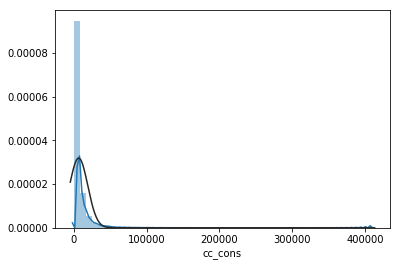

In [12]:
sns.distplot(train_data_orig['cc_cons'],fit= norm)


In [13]:
#Get the params of the normal distribution
(mu,sigma) = norm.fit(train_data_orig['cc_cons'])

In [14]:
print(f' Mean= {mu} and Standard Deviation= {sigma}')

 Mean= 6824.631840341255 and Standard Deviation= 12458.950780887968


In [15]:
log_cc = np.log1p(train_data_orig['cc_cons'])

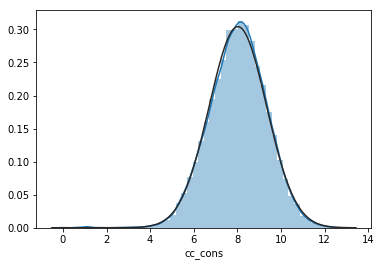

In [16]:
sns.distplot(log_cc,fit= norm)

In [17]:
#Get the params of the log  normal distribution
(mu1,sigma1) = norm.fit(log_cc)
print(f' Mean= {mu1} and Standard Deviation= {sigma1}')

 Mean= 8.019917130836976 and Standard Deviation= 1.3112754881082243


In [18]:
#Taking Log values for all credit card consumption values
data['cc_cons'] = np.log1p(data['cc_cons'])
data['cc_cons_apr'] = np.log1p(data['cc_cons_apr'])
data['cc_cons_may'] = np.log1p(data['cc_cons_may'])
data['cc_cons_jun'] = np.log1p(data['cc_cons_jun'])

In [19]:
data.describe()

,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,...,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed
count,46887.000000,4.687500e+04,32820.000000,46887.000000,46887.000000,46887.000000,43450.000000,44663.000000,45192.000000,4.212000e+04,...,1.946000e+03,579.000000,4.212000e+04,4.468100e+04,4.198700e+04,3876.0,4142.0,46887.000000,1201.0,2306.0
mean,35.945678,1.214109e+05,8.019917,9.048571,8.307646,8.853131,9.165386,12.324362,9.549522,7.499329e+04,...,4.133151e+04,4757.864336,4.605661e+04,4.401207e+04,4.930503e+04,1.0,1.0,555.055751,1.0,1.0
std,8.434601,1.229824e+05,1.311295,1.188048,1.275239,1.233586,10.184364,11.549236,9.465068,1.658658e+05,...,1.077728e+05,6125.215059,1.069466e+05,1.071309e+05,1.200914e+05,0.0,0.0,188.289092,0.0,0.0
min,22.000000,0.000000e+00,0.000000,5.459458,3.951244,4.644391,1.000000,1.000000,1.000000,2.400000e+01,...,0.000000e+00,-20217.000000,1.800000e-01,6.000000e-02,1.500000e-01,1.0,1.0,123.000000,1.0,1.0
25%,31.000000,4.500000e+04,7.159292,8.213653,7.394681,7.996921,3.000000,4.000000,3.000000,2.538712e+04,...,6.000000e+03,909.000000,1.800000e+04,1.608900e+04,1.826350e+04,1.0,1.0,425.000000,1.0,1.0
50%,34.000000,7.500000e+04,8.052615,9.093638,8.321178,8.900822,7.000000,9.000000,7.000000,4.403300e+04,...,2.500000e+04,4889.000000,2.816000e+04,2.700000e+04,3.000000e+04,1.0,1.0,575.000000,1.0,1.0
75%,39.000000,1.450000e+05,8.902490,9.899577,9.211694,9.729478,12.000000,17.000000,13.000000,7.920906e+04,...,5.000000e+04,6885.000000,4.800000e+04,4.738600e+04,5.000000e+04,1.0,1.0,683.000000,1.0,1.0
max,224.000000,1.350000e+06,12.920568,13.598242,12.970432,13.926378,1012.000000,653.000000,601.000000,1.310058e+07,...,2.500000e+06,35346.000000,1.202915e+07,1.293238e+07,1.285103e+07,1.0,1.0,978.000000,1.0,1.0


Univariate Analysis

In [20]:
data['gender'].value_counts()

M    40150
F     6737
Name: gender, dtype: int64

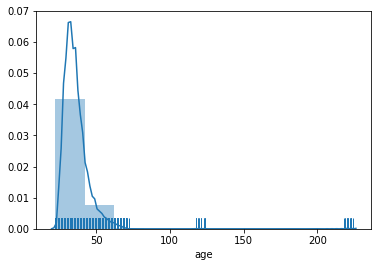

In [21]:
sns.distplot(data['age'], bins=10, kde=True, rug=True)

There are lot of outliers in age. There are rows of data where the age > 100

In [22]:
print(data['region_code'].value_counts())

683    5691
723    3876
233    3841
623    3645
523    3621
534    2282
245    1507
324    1471
823     994
524     503
503     458
544     451
764     396
244     378
533     345
283     340
425     323
513     320
519     305
505     280
653     280
575     259
545     245
818     244
349     240
535     237
805     231
264     220
726     216
554     210
       ... 
956       1
295       1
363       1
928       1
555       1
317       1
635       1
532       1
863       1
272       1
963       1
675       1
277       1
611       1
885       1
388       1
343       1
915       1
243       1
962       1
914       1
261       1
357       1
450       1
389       1
689       1
633       1
771       1
921       1
495       1
Name: region_code, Length: 423, dtype: int64


Bi Varaite Analysis

Compare gender to cc_cons and age to cc_cons

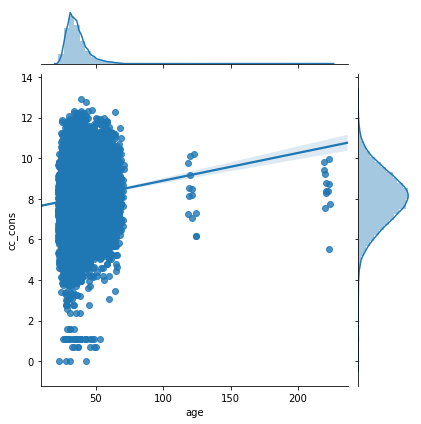

In [23]:
sns.jointplot(x="age", y="cc_cons", data=data,kind='reg')

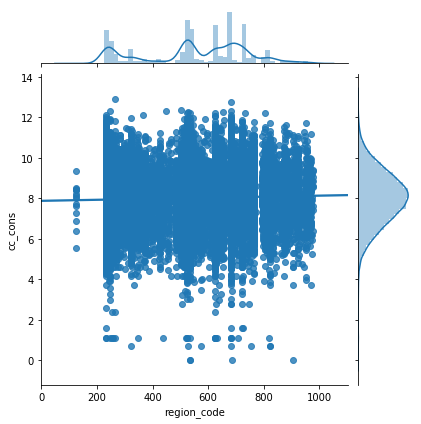

In [42]:
sns.jointplot(x="region_code", y="cc_cons", data=data,kind='reg')

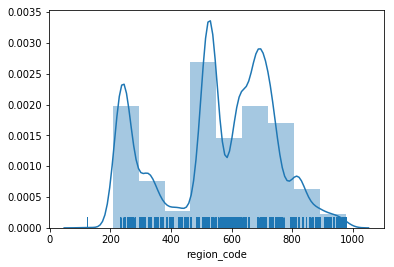

In [63]:
sns.distplot(train_data_orig['region_code'], bins=10, kde=True, rug=True)

In [24]:
bins=[0,20,30,40,50,60,70,80]
cc_cons_age = np.digitize(data['age'],bins)
#print(cc_cons_age)
print (data.groupby(cc_cons_age).head())
#plt.hist(cc_cons_age,bins=bins)
#plt.show()

      account_type  age  card_lim   cc_cons  cc_cons_apr  cc_cons_jun  \
0           saving   63  150000.0  6.077642     8.948456     6.434547   
1          current   33  176000.0  7.561122    10.872428     6.992096   
2          current   44   65000.0  7.586296     9.287439     7.063904   
3           saving   44  600000.0  9.979522     9.949273     9.374116   
4           saving   35  100000.0  7.503841     7.077355     6.852243   
5          current   26   50000.0  6.440947    10.893417     6.955593   
6          current   30   30000.0  7.627057     7.310550     7.583248   
7          current   32   25000.0  6.075346     7.521859     6.507278   
8          current   37  300000.0  9.243001     9.128688     9.343188   
9           saving   47   64000.0  7.798933     9.126123     9.591718   
10          saving   58  245000.0  7.853216    10.551599     5.726848   
11         current   43   55000.0  7.636752     8.444091     7.760893   
12          saving   42  200000.0  8.527342     9.7

region_code
123      108.957244
233    21218.247527
234        6.411818
243        9.386812
244     2049.300064
245     8426.012841
246      439.819441
247      509.823060
248      522.141697
249      119.887453
250      218.948934
254      358.973211
255      706.504996
256      183.121036
257      529.049282
258      156.903974
259      240.588849
261        8.110728
263      789.257307
264     1251.726671
265      268.877452
266     1048.240533
267      936.716015
268       72.972668
269      203.358139
270      532.481927
271      388.735281
272        7.612337
274      482.210521
275      371.197616
           ...     
938       35.889428
939       21.874121
944       38.380138
945       37.956149
946       91.954960
947       22.987348
948       48.860665
949       69.951197
950      101.320576
951      103.458376
952        8.519790
954      366.272060
955       58.336269
956        6.508769
957      353.230814
958       30.630031
962        7.372746
963        6.678342
964     

(array([200.,  68.,  36.,  28.,  18.,  16.,  10.,   8.,   1.,   4.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 <a list of 10 Patch objects>)

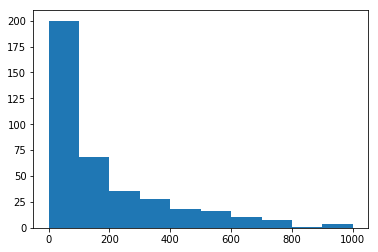

In [25]:
cc_cons_reg = data.groupby(['region_code'])['cc_cons'].sum()
print(cc_cons_reg)
bins=[0,100,200,300,400,500,600,700,800,900,1000]
plt.hist(cc_cons_reg,bins=bins)

Fill loan_enq with 'N'

In [26]:
data['loan_enq'].fillna('N',inplace=True)

In [27]:
#Convert Categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['account_type'] = le.fit_transform(data['account_type'])
data['loan_enq'] = le.fit_transform(data['loan_enq'])

In [28]:
# sex=pd.crosstab(train_data_orig['gender'],train_data_orig['cc_cons'])
# sex.div(sex.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [29]:
#Analysing whether region influences credit card consumption


In [30]:
#sns.pairplot(train_data_orig)

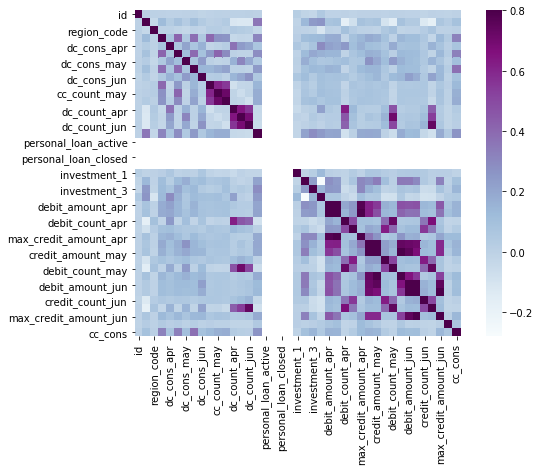

In [31]:
matrix = train_data_orig.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [32]:
data.isnull().sum()

account_type                 0
age                          0
card_lim                    12
cc_cons                  14067
cc_cons_apr                  0
cc_cons_jun                  0
cc_cons_may                  0
cc_count_apr              3437
cc_count_jun              2224
cc_count_may              1695
credit_amount_apr         4767
credit_amount_jun         2206
credit_amount_may         4900
credit_count_apr          2546
credit_count_jun          2183
credit_count_may          2968
dc_cons_apr              27282
dc_cons_jun              30361
dc_cons_may              24714
dc_count_apr             27282
dc_count_jun             22049
dc_count_may             24714
debit_amount_apr          2737
debit_amount_jun          3140
debit_amount_may          3302
debit_count_apr           2546
debit_count_jun           2183
debit_count_may           2968
emi_active                   0
gender                       0
id                           0
investment_1             44811
investme

Sparsely Populated columns - Loan Enq, personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment(1,2,3,4) Fill 0's for non filled columns

In [33]:
data.head(3)

,account_type,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,...,investment_4,loan_enq,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed
0,1,63,150000.0,6.077642,8.948456,6.434547,6.173786,2.0,3.0,1.0,...,NaN,0,50000.0,470.0,45000.0,NaN,NaN,305,NaN,NaN
1,0,33,176000.0,7.561122,10.872428,6.992096,10.304744,11.0,11.0,14.0,...,NaN,0,70000.0,27000.0,150000.0,NaN,1.0,326,NaN,NaN
2,0,44,65000.0,7.586296,9.287439,7.063904,9.983252,6.0,6.0,9.0,...,NaN,0,11700.0,20800.0,13800.0,NaN,NaN,264,NaN,NaN


Fill the sparse columns mentioned above with 0 doing it across both train and test data

In [34]:
data['personal_loan_active'].fillna(0,inplace=True)
data['vehicle_loan_active'].fillna(0,inplace=True)
data['personal_loan_closed'].fillna(0,inplace=True)
data['vehicle_loan_closed'].fillna(0,inplace=True)
data['investment_1'].fillna(0,inplace=True)
data['investment_2'].fillna(0,inplace=True)
data['investment_3'].fillna(0,inplace=True)
data['investment_4'].fillna(0,inplace=True)

In [35]:
data['cc_count_apr'].fillna(0,inplace=True)
data['cc_count_may'].fillna(0,inplace=True)
data['cc_count_jun'].fillna(0,inplace=True)
data['credit_amount_apr'].fillna(0,inplace=True)
data['credit_amount_may'].fillna(0,inplace=True)
data['credit_amount_jun'].fillna(0,inplace=True)
data['credit_count_apr'].fillna(0,inplace=True)
data['credit_count_may'].fillna(0,inplace=True)
data['credit_count_jun'].fillna(0,inplace=True)
data['dc_cons_apr'].fillna(0,inplace=True)
data['dc_cons_may'].fillna(0,inplace=True)
data['dc_cons_jun'].fillna(0,inplace=True)
data['dc_count_apr'].fillna(0,inplace=True)
data['dc_count_may'].fillna(0,inplace=True)
data['dc_count_jun'].fillna(0,inplace=True)
data['debit_amount_apr'].fillna(0,inplace=True)
data['debit_amount_may'].fillna(0,inplace=True)
data['debit_amount_jun'].fillna(0,inplace=True)
data['debit_count_apr'].fillna(0,inplace=True)
data['debit_count_may'].fillna(0,inplace=True)
data['debit_count_jun'].fillna(0,inplace=True)
data['max_credit_amount_apr'].fillna(0,inplace=True)
data['max_credit_amount_may'].fillna(0,inplace=True)
data['max_credit_amount_jun'].fillna(0,inplace=True)

Handle Outliers

In [36]:
#credit_value = data.groupby(['age','gender','account_type'])['card_lim'].median()
card_lim_value = data.groupby(['age'])['card_lim'].median()
data['card_lim'].fillna(data['age'].map(lambda age:card_lim_value[age]),inplace=True)

In [37]:
# a = data < 0
# print(data[a])

In [38]:
#Investment 4 has lot of negative values, changing them to positive values
data['investment_4']= list(map(lambda x: x if x> 0 else x * -1,data['investment_4'] ))

In [39]:
data['age']= list(map(lambda x: x if x< 100 else x % 100,data['age'] ))


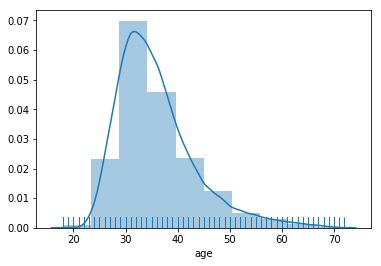

In [40]:
sns.distplot(data['age'], bins=10, kde=True, rug=True)

In [41]:
#Split data into train and test
train = data[0:32820]
test = data[32820:]
y= train['cc_cons']

In [42]:
print(train.shape)
print(test.shape)

(32820, 44)
(14067, 44)


In [43]:
test = test.drop(['cc_cons','id'],axis=1)
train = train.drop(['cc_cons','id'],axis=1)

In [44]:
data['region_code'] = le.fit_transform(data['region_code'])
print(data['region_code'].unique())

[ 41  50  19   1  48 252 366 162 245  31 353 275 174  85  82 421 154 185
 156 227 217 383 348 351 295 373 155 203 177   5 320  66 332 329 319 261
  12 368 223 159   6 106  14  21 169 113 265 226 191 228 165 141 105 323
 407  84 264 290 302 232 166 328  26 280 161 270 152 308  11 101 179 170
  16  28 278 255 225 149 209 112 104  15  18 182 286 236 293  56  10  95
 195  45 143 321   4 324 242  83 151  61 405 277 142 163 248 157 235   8
 349 144  34 238  49 243   7 318 259 109 241 138  52  25 418 306 136 408
 145 288  90 167 126  79  22 392 382  55 330 262 133 224 317 301 396  58
 230  20  99  29  32  80 202  43 146 281 299 254  89 331 315 137 108 400
 173 247 258 297 240 411 102 354  71 304  40 385 187 313 229  13 250 322
 237  36 194 284 118 246  39 257 135  78 355 298 397 231   0 114 219 357
 181 139 340 294 134 147 164 309 414 249 124  70 384 129 326 305 100  72
 360 125 239  96 263 184 190 346  73 303 279 172 406  35 289  24 367 404
 178 103  81  62 300 282 333 350  59 274  42 291 23

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 32820 to 46886
Data columns (total 42 columns):
account_type             14067 non-null int32
age                      14067 non-null int64
card_lim                 14067 non-null float64
cc_cons_apr              14067 non-null float64
cc_cons_jun              14067 non-null float64
cc_cons_may              14067 non-null float64
cc_count_apr             14067 non-null float64
cc_count_jun             14067 non-null float64
cc_count_may             14067 non-null float64
credit_amount_apr        14067 non-null float64
credit_amount_jun        14067 non-null float64
credit_amount_may        14067 non-null float64
credit_count_apr         14067 non-null float64
credit_count_jun         14067 non-null float64
credit_count_may         14067 non-null float64
dc_cons_apr              14067 non-null float64
dc_cons_jun              14067 non-null float64
dc_cons_may              14067 non-null float64
dc_count_apr             14

In [46]:
# # Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.fit_transform(test)

In [47]:
x_train,x_cv,y_train,y_cv = train_test_split(X_train,y,test_size=0.3)

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250)
model.fit(x_train,y_train)
pred_cv = model.predict(x_cv)
print(np.sqrt(mean_squared_log_error(y_cv, pred_cv))*100)
pred_test = model.predict(X_test)
print(model.feature_importances_)
submission = pd.DataFrame({
        "id": test_data_orig['id'],
        "cc_cons": pred_test
    })
submission.to_csv('C:/Python/AmExpert/data/RF_submission.csv', index=False)

14.745573902352053
[0.00396262 0.03177819 0.07881299 0.06332208 0.10757399 0.10790502
 0.02645343 0.04385685 0.02608447 0.02322363 0.02718749 0.0244321
 0.01450268 0.01606688 0.01437332 0.01407765 0.01553135 0.01454214
 0.00747776 0.01106687 0.00783055 0.02939837 0.02946427 0.02862933
 0.0201634  0.01995897 0.01881393 0.02785246 0.00528428 0.0033164
 0.00489248 0.0048063  0.00072228 0.00082595 0.02518865 0.03152391
 0.02550305 0.00256768 0.00253546 0.03548767 0.00130724 0.00169584]


In [49]:
importances = pd.Series(model.feature_importances_,index=train.columns)
importances = pd.DataFrame(importances,columns=['score'])
print(importances)

                          score
account_type           0.003963
age                    0.031778
card_lim               0.078813
cc_cons_apr            0.063322
cc_cons_jun            0.107574
cc_cons_may            0.107905
cc_count_apr           0.026453
cc_count_jun           0.043857
cc_count_may           0.026084
credit_amount_apr      0.023224
credit_amount_jun      0.027187
credit_amount_may      0.024432
credit_count_apr       0.014503
credit_count_jun       0.016067
credit_count_may       0.014373
dc_cons_apr            0.014078
dc_cons_jun            0.015531
dc_cons_may            0.014542
dc_count_apr           0.007478
dc_count_jun           0.011067
dc_count_may           0.007831
debit_amount_apr       0.029398
debit_amount_jun       0.029464
debit_amount_may       0.028629
debit_count_apr        0.020163
debit_count_jun        0.019959
debit_count_may        0.018814
emi_active             0.027852
gender                 0.005284
investment_1           0.003316
investme

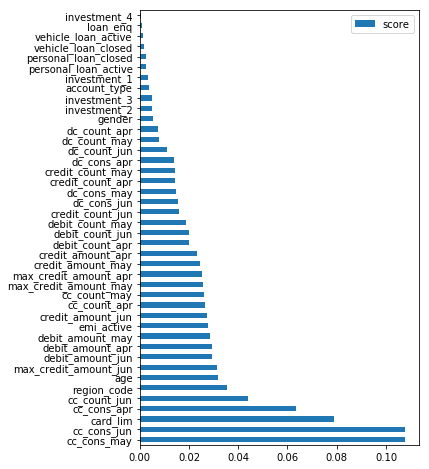

In [50]:
importances = importances.sort_values(by='score',ascending=False)
importances.plot(kind='barh',figsize=(5,8))

In [51]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

In [52]:
models = {'svm-SVR': SVR,
          'svm-LinearSVR': LinearSVR, 
          'svm-NuSVR': NuSVR,
          'RandomForest': RandomForestRegressor,
          'KNeighbors': KNeighborsRegressor,
          'DecisionTree': DecisionTreeRegressor, 
          'ExtraTree': ExtraTreeRegressor,
          'GaussianProcess': GaussianProcessRegressor}

In [138]:
from sklearn.svm import SVR, LinearSVR, NuSVR
model = NuSVR()
model.fit(x_train,y_train)
pred_cv = model.predict(x_cv)
print(np.sqrt(mean_squared_log_error(y_cv, pred_cv))*100)
pred_test = model.predict(test)
#print(model.feature_importances_)
# submission = pd.DataFrame({
#         "id": test_data_orig['id'],
#         "cc_cons": pred_test
#     })
# submission.to_csv('C:/Python/AmExpert/data/NuSVR_submission.csv', index=False)

C:\Users\Srividya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


14.624302794429697


In [64]:
from sklearn.metrics import accuracy_score, explained_variance_score, mean_squared_log_error

In [75]:
def run_models(x_train, y_train, X_cv, y_cv, model, cm=False, label='', target=''):

    """
    Fits model to X_train and y_train
    Predicts targets for X_test
    Provides metrics for prediction success of y_test
    """
    
    print(label)
    model.fit(x_train,y_train)
    pred_cv = model.predict(x_cv)
    
    acc = explained_variance_score(y_cv, pred_cv)
    error = np.sqrt(mean_squared_log_error(y_cv, pred_cv))*100
    print("Accuracy: %f, Error: %f" % (acc, error))

In [77]:
for value in models:
    _=run_models(x_train, y_train, x_cv, y_cv, models[value](), label=value)

svm-SVR


C:\Users\Srividya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.191482, Error: 14.835737
svm-LinearSVR


C:\Users\Srividya\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Srividya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.172693, Error: 14.971505
svm-NuSVR
Accuracy: 0.194917, Error: 14.785943
RandomForest


C:\Users\Srividya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.122546, Error: 15.250510
KNeighbors
Accuracy: 0.028068, Error: 15.942310
DecisionTree
Accuracy: -0.640662, Error: 20.785781
ExtraTree
Accuracy: -0.689152, Error: 21.053302
GaussianProcess
Accuracy: -6.584386, Error: 123.601853


In [125]:
#data['cc_cons_qtr'] = data['cc_cons_apr'] + data['cc_cons_may'] + data['cc_cons_jun']
# data['cc_count_qtr'] = data['cc_count_apr'] + data['cc_count_may'] + data['cc_count_jun']
# data['credit_amount_qtr'] = data['credit_amount_apr'] + data['credit_amount_may'] + data['credit_amount_jun']
# data['credit_count_qtr'] = data['credit_count_apr'] + data['credit_count_may'] + data['credit_count_jun']
# data['dc_cons_qtr'] = data['dc_cons_apr'] + data['dc_cons_may'] + data['dc_cons_jun']
# data['dc_count_qtr'] = data['dc_count_apr'] + data['dc_count_may'] + data['dc_count_jun']
# data['debit_amount_qtr'] = data['debit_amount_apr'] + data['debit_amount_may'] + data['debit_amount_jun']
# data['debit_count_qtr'] = data['debit_count_apr'] + data['debit_count_may'] + data['debit_count_jun']
# data['investment'] = data['investment_1'] + data['investment_2'] + data['investment_3'] + data['investment_4']

In [126]:
#data = data.drop(['cc_count_apr','cc_count_may','cc_count_jun'],axis=1)

In [127]:
# data = data.drop(['credit_amount_apr','credit_amount_may','credit_amount_jun','credit_count_apr','credit_count_may'],axis=1)
# data = data.drop(['dc_cons_apr','dc_cons_may','dc_cons_jun','dc_count_apr','dc_count_may','dc_count_jun'],axis=1)
# data = data.drop(['debit_amount_apr','debit_amount_may','debit_amount_jun','debit_count_apr','debit_count_may','debit_count_jun'],axis=1)
# data = data.drop(['investment_1','investment_2','investment_3','investment_4'],axis=1)

In [79]:
# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=20)
# fit = bestfeatures.fit(x_train,y_train)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(x_train.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(20,'Score'))  #print 10 best features

In [67]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_log_error
# model = LinearRegression()
# model.fit(x_train,y_train)
# pred_cv = model.predict(x_cv)
# #print(np.sqrt(mean_squared_log_error(y_cv, pred_cv)))

# pred_test = model.predict(test)
# submission = pd.DataFrame({
#         "id": test_data_orig['id'],
#         "cc_cons": pred_test
#     })
# submission.to_csv('C:/Python/AmExpert/data/LinReg_submission.csv', index=False)

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=225,max_features=25,max_depth=15,min_samples_leaf=15)
rf.fit(x_train,y_train)
pred_cv = rf.predict(x_cv)
print(np.sqrt(mean_squared_log_error(np.exp(y_cv)-1, np.exp(pred_cv)-1)*100))
# pred_test = model.predict(test)
# print(model.feature_importances_)
# submission = pd.DataFrame({
#         "id": test_data_orig['id'],
#         "cc_cons": np.exp(pred_test)-1
#     })
# submission.to_csv('C:/Python/AmExpert/data/RF_submission.csv', index=False)

11.758366369747195


In [ ]:
#11.7713188392922 RandomForestRegressor(n_estimators=225,max_features=25,max_depth=10,min_samples_leaf=15)
#11.784481999052865 RandomForestRegressor(n_estimators=225,max_features=25,max_depth=10)

In [150]:
nusvr = NuSVR(gamma='auto',nu=0.5,C=0.6)
nusvr.fit(X=x_train,y=y_train)
pred_cv = nusvr.predict(x_cv)
print(np.sqrt(mean_squared_log_error(np.exp(y_cv)-1, np.exp(pred_cv)-1)*100))
# pred_test = nusvr.predict(test)
# submission = pd.DataFrame({
#         "id": test_data_orig['id'],
#         "cc_cons": np.exp(pred_test)-1
#     })
# submission.to_csv('C:/Python/AmExpert/data/NuSVR_submission.csv', index=False)

11.811843095848337


In [102]:
from sklearn.feature_selection import SelectFromModel

In [99]:


#11.817941233131648  NuSVR(gamma='auto',nu=0.5,C=0.8)
#11.825826819261177  NuSVR(gamma='auto',nu=0.5)
#11.821349644879135  NuSVR(gamma='auto',nu=0.5,C=0.9)

In [103]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(base_estimator=model)
ada.fit(x_train,y_train)
pred_cv = ada.predict(x_cv)
print(np.sqrt(mean_squared_log_error(np.exp(y_cv)-1, np.exp(pred_cv)-1)*100))
pred_test = model.predict(test)
#print(ada.feature_importances_)
submission = pd.DataFrame({
        "id": test_data_orig['id'],
        "cc_cons": np.exp(pred_test)-1
    })
submission.to_csv('C:/Python/AmExpert/data/RF_submission.csv', index=False)

12.34625559545349


In [104]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [105]:
lr = LinearRegression()
lr.fit(x_train,y_train)

pred_cv = lr.predict(x_cv)
print(np.sqrt(mean_squared_log_error(np.exp(y_cv)-1, np.exp(pred_cv)-1)*100))

11.925359294273207


In [165]:
ridge = Ridge(alpha = 200)
ridge.fit(x_train,y_train)

pred_cv = ridge.predict(x_cv)
print(np.sqrt(mean_squared_log_error(np.exp(y_cv)-1, np.exp(pred_cv)-1)*100))

11.921757238381696


In [154]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

pred_cv = lasso.predict(x_cv)
print(np.sqrt(mean_squared_log_error(np.exp(y_cv)-1, np.exp(pred_cv)-1)*100))

11.915865377831832


In [144]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return (( 0.1 * ridge.predict(X)) + \
            ( 0.13 * lasso.predict(X)) + \
            ( 0.22 * lr.predict(X)) + \
            ( 0.35 * rf.predict(X)) + \
            ( 0.20 * nusvr.predict(X)))
           

In [166]:
# Get final precitions from the blended model

print('RMSLE score on train data:')
print(np.sqrt(mean_squared_log_error(np.exp(y_cv)-1, np.exp(blended_predictions(x_cv))-1)*100))

RMSLE score on train data:
11.752547911998462


In [168]:
pred_test = blended_predictions(test)

In [171]:
submission = pd.DataFrame({
        "id": test_data_orig['id'],
        "cc_cons": pred_test
    })
submission.to_csv('C:/Python/AmExpert/data/Blended_submission.csv', index=False)